In [4]:
import uproot
import matplotlib.pyplot as plt
!python -m pip install seaborn
import seaborn as sns

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached numpy-1.19.5-cp36-cp36m-manylinux2010_x86_64.whl (14.8 MB)
  Using cached scipy-1.5.4-cp36-cp36m-manylinux1_x86_64.whl (25.9 MB)
  Using cached matplotlib-3.3.4-cp36-cp36m-manylinux1_x86_64.whl (11.5 MB)
     |████████████████████████████████| 9.5 MB 16.1 MB/s            
     |████████████████████████████████| 3.1 MB 52.3 MB/s            
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     |████████████████████████████████| 98 kB 2.7 MB/s             
  Using cached kiwisolver-1.3.1-cp36-cp36m-manylinux1_x86_64.whl (1.1 MB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
     |████████████████████████████████| 499 kB 19.4 MB/s            
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)


ModuleNotFoundError: No module named 'seaborn'

In [ ]:
fname="rstorage/ml/herwig/qcdrootified/_rstorage_ml_herwig_gen_qcd_qcd_20_198689_LHC_qcd-S198689-04/qcd_jet_files_herwig_jets.root"
df = uproot.open(fname)['tnjets'].arrays(library='pd')

In [ ]:
plt.matshow(df.corr())
plt.show()

In [2]:
g = sns.pairplot(df)
plt.show()

NameError: name 'sns' is not defined

In [5]:
dfselect = df.loc[(df['pt'] > 500) & (df['pt'] < 550)]

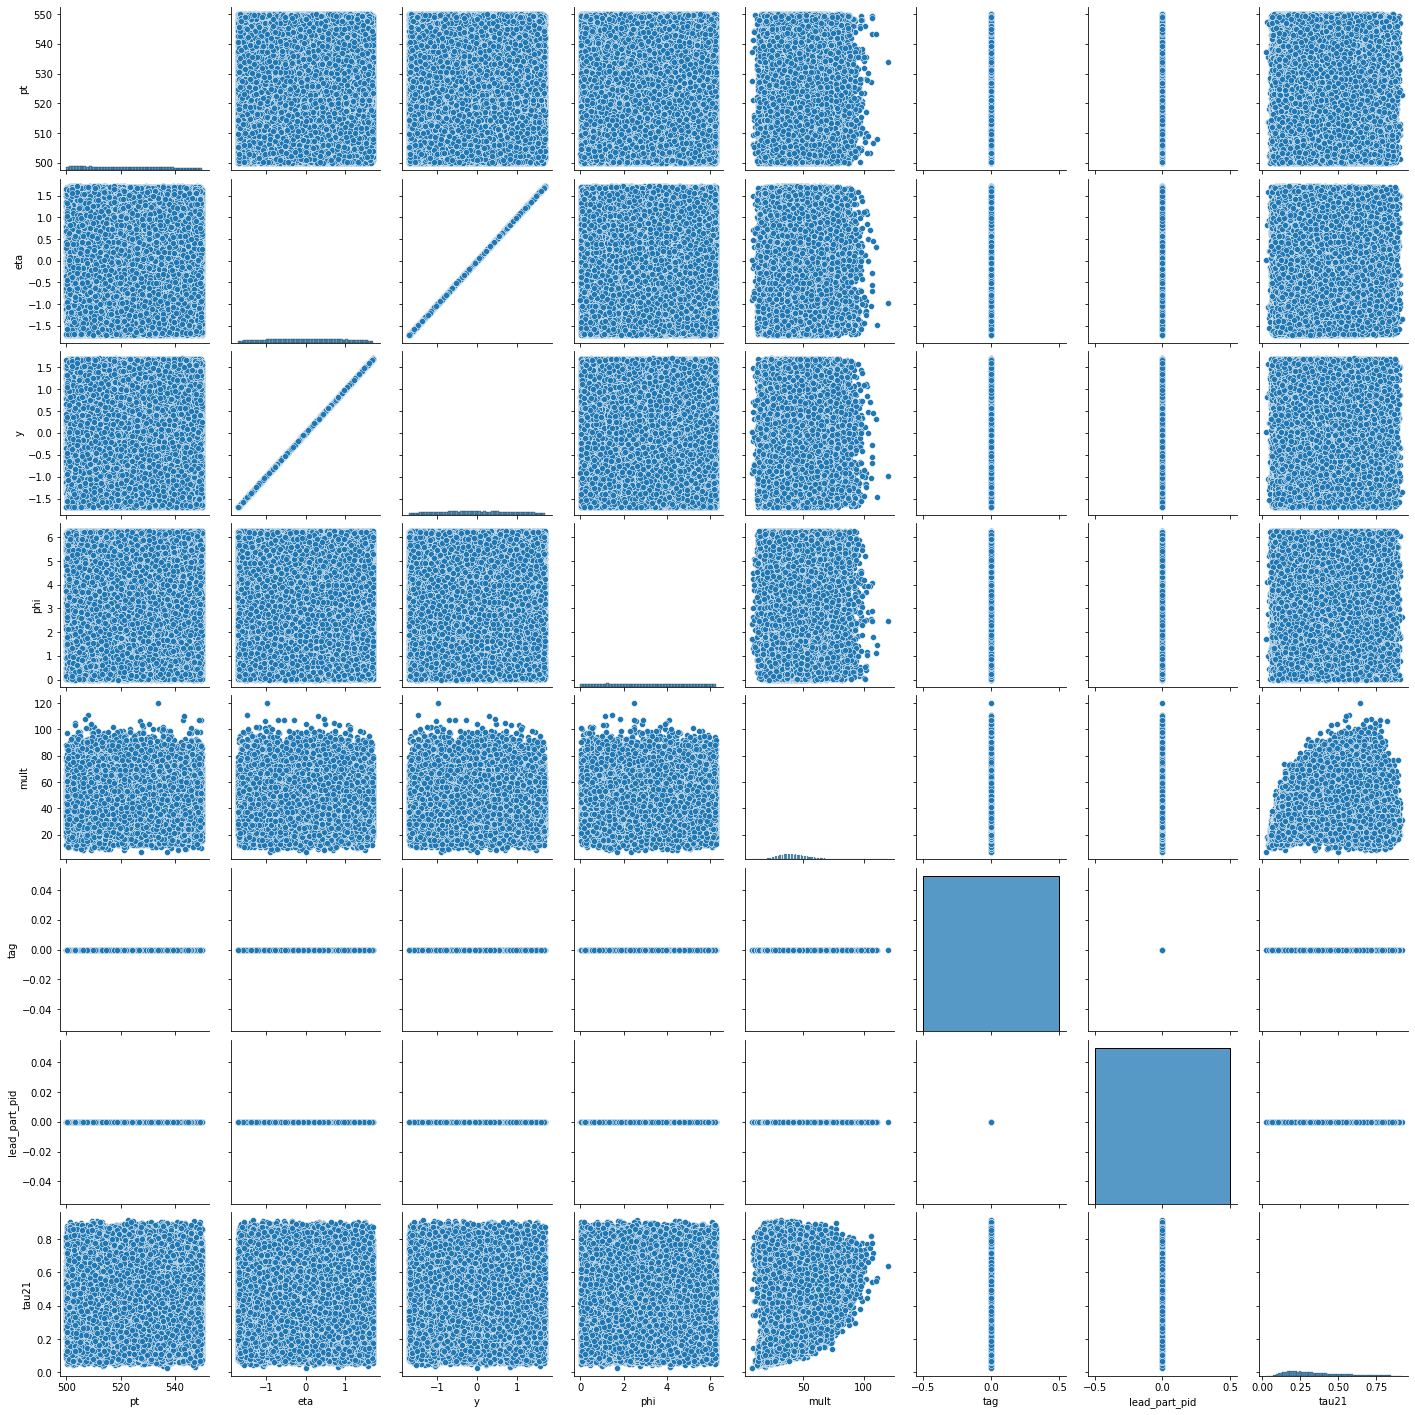

In [6]:
g = sns.pairplot(dfselect)
plt.show()

In [7]:
df_z = {'df': uproot.open('./z_jet_files_jets.root')['tnjets'].arrays(library='pd'),		'color' : 'red', 	'label': 'Z jets'}
df_g = {'df': uproot.open('./glue_jet_files_jets.root')['tnjets'].arrays(library='pd'),		'color' : 'blue', 	'label': 'gluon jets'}
df_q = {'df': uproot.open('./quark_jet_files_jets.root')['tnjets'].arrays(library='pd'),	'color' : 'green', 	'label': 'quark jets'}

ddfs = [df_z, df_g, df_q]
for i, ddf in enumerate(ddfs):
	df = ddf['df']
	ddf['df_filtered'] = df.loc[(df['pt'] > 500) & (df['pt'] < 550) & (df['tau21']>0)]


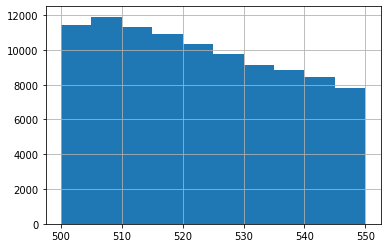

In [8]:
df = ddfs[0]['df_filtered']
hist = df['pt'].hist()